# Assignment 2: Linear Models and Validation Metrics (30 marks total)
### Due: October 10 at 11:59pm

### Name: SOUMINI MOHANDAS

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (14.5 marks total)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [2]:
# Import spam dataset from yellowbrick library
from yellowbrick.datasets import load_spam

In [3]:
# Load the spam dataset into a feature matrix X and a target vector y
X, y = load_spam()

In [4]:
# Print the size and type of the feature matrix X 
# Shape indicates (n_samples, n_features)
print("The shape of feature matrix X: ", X.shape) 
print("The type of feature matrix X: ", type(X))

The shape of feature matrix X:  (4600, 57)
The type of feature matrix X:  <class 'pandas.core.frame.DataFrame'>


In [5]:
# Print the size and type of the target vector y 
# Shape indicates length (n_samples)
print("The shape of target vector y: ", y.shape) 
print("The type of taget vector y: ", type(y))

The shape of target vector y:  (4600,)
The type of taget vector y:  <class 'pandas.core.series.Series'>


In [6]:
# Shows the various columns present in the feature matrix X
# (i.e., 57 features = 57 columns)
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54


In [7]:
# Shows the 1D target array having only 1 column (i.e., is_spam)
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: is_spam, dtype: int64

In [8]:
# Check if the X dataframe contains any missing or NaN values
# sum() indicates the total count of NaN values present in each column 
X.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [9]:
# Check if the target vector y has any missing values 
# present in its 1 column (i.e., is_spam)
y.isnull().sum()

0

### Step 2: Data Processing (1.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [10]:
# As seen in the above 2 commands, there are no missing or NaN values
# in either the feature matrix X or the target vector y
# Hence it is not necessary to use a method to fill in missing values
# If missing values had existed, we would have used the following commands
# assuming that we are filling it with Zeros instead of just dropping 
# the row or column containing missing or NaN values 
# X.fillna(0) # For feature matrix X
# y.fillna(0) # For target vector y 

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data.

In [11]:
# Splitting is done using the train_test_split utility in SciKit-Learn
from sklearn.model_selection import train_test_split
# Create a new feature matrix X_small and a new target vector y_small 
# using only 5% of the data to train
X_small, X_small_t, y_small, y_small_t = train_test_split(X, y, random_state=0, train_size=0.05)

In [12]:
# Number of samples in X and y were 4600. 5% of 4600 = 230
# Hence X_small & y_small contain 230 samples of data 
print("The shape of feature matrix X_small: ", X_small.shape)
print("The shape of target vector y_small: ", y_small.shape)

The shape of feature matrix X_small:  (230, 57)
The shape of target vector y_small:  (230,)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

In [13]:
# Choose a model class (in this case - Logistic Regression) 
from sklearn.linear_model import LogisticRegression

In [14]:
# Instantiate the model with max_iter = 2000 for the first dataset
model = LogisticRegression(max_iter=2000)

In [15]:
# Implement the above model with X and y dataset
# 20& data to test and 80% data to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
# Fit the model on the training set
model.fit(X_train, y_train)
# Evaluate the model with the testing set and compare it with the training set 
from sklearn.metrics import accuracy_score
y_test_pred = model.fit(X_train, y_train).predict(X_test)
y_train_pred = model.fit(X_test, y_test).predict(X_train)
print("With X and y, The training accuracy is: ", accuracy_score(y_train, y_train_pred))
print("With X and y, The validation accuracy is: ", accuracy_score(y_test, y_test_pred))

With X and y, The training accuracy is:  0.9222826086956522
With X and y, The validation accuracy is:  0.9369565217391305


In [16]:
# Instantiate the model with max_iter = 2000 for the second dataset
model = LogisticRegression(max_iter=2000)

In [17]:
# Using only first two columns of X and y
X, y = load_spam()
X_columns = X[["word_freq_make", "word_freq_address"]]
X_columns.head(10)

,word_freq_make,word_freq_address
0,0.21,0.28
1,0.06,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.15,0.00
8,0.06,0.12
9,0.00,0.00


In [18]:
y_columns = y
y_columns.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: is_spam, dtype: int64

In [19]:
# Implement the above model with X_columns and y_columns dataset
# 20& data to test and 80% data to train the model
X_col_train, X_col_test, y_col_train, y_col_test = train_test_split(X_columns, y_columns, random_state=0, test_size=0.20)
# Fit the model on the training set
model.fit(X_col_train, y_col_train)
# Evaluate the model with the testing set and compare it with the training set 
from sklearn.metrics import accuracy_score
y_col_test_pred = model.fit(X_col_train, y_col_train).predict(X_col_test)
y_col_train_pred = model.fit(X_col_test, y_col_test).predict(X_col_train)
print("With X_columns and y_columns, The training accuracy is: ", accuracy_score(y_col_train, y_col_train_pred))
print("With X_columns and y_columns, The validation accuracy is: ", accuracy_score(y_col_test, y_col_test_pred))

With X_columns and y_columns, The training accuracy is:  0.6377717391304348
With X_columns and y_columns, The validation accuracy is:  0.5934782608695652


In [20]:
# Instantiate the model with max_iter = 2000 for the third dataset
model = LogisticRegression(max_iter=2000)

In [21]:
# Implement the above model with X_small and y_small dataset
# 20& data to test and 80% data to train the model
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small, random_state=0, test_size=0.20)
# Fit the model on the training set
model.fit(X_small_train, y_small_train)
# Evaluate the model with the testing set and compare it with the training set 
from sklearn.metrics import accuracy_score
y_small_test_pred = model.fit(X_small_train, y_small_train).predict(X_small_test)
y_small_train_pred = model.fit(X_small_test, y_small_test).predict(X_small_train)
print("With X_small and y_small, The training accuracy is: ", accuracy_score(y_small_train, y_small_train_pred))
print("With X_small and y_small, The validation accuracy is: ", accuracy_score(y_small_test, y_small_test_pred))

With X_small and y_small, The training accuracy is:  0.8369565217391305
With X_small and y_small, The validation accuracy is:  0.9130434782608695


### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [22]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

In [23]:
# results is initially stored in a list
results_list = []
# Three different datasets for different data sizes 
datasets = [{"size": X.shape, "X": X, "y": y},
    {"size": X_columns.shape, "X": X_columns, "y": y_columns},
    {"size": X_small.shape, "X": X_small, "y": y_small}]
# A for-loop to store data in the "results" list
for dataset in datasets:
    X_train, X_val, y_train, y_val = train_test_split(dataset["X"], dataset["y"], random_state=0, test_size=0.20)
    # Calculating training accuracy
    training_accuracy = accuracy_score(y_train, model.fit(X_val, y_val).predict(X_train))
    # Calculating validation accuracy
    validation_accuracy = accuracy_score(y_val, model.fit(X_train, y_train).predict(X_val))
    # Adding results to the DataFrame
    results_list.append([dataset["size"], training_accuracy, validation_accuracy])
# Creating a DataFrame from the results list
results = pd.DataFrame(results_list, columns=["Data size", "Training accuracy", "Validation accuracy"])
# Printing the results DataFrame
print(results)

    Data size  Training accuracy  Validation accuracy
0  (4600, 57)           0.922283             0.936957
1   (4600, 2)           0.637772             0.593478
2   (230, 57)           0.836957             0.913043


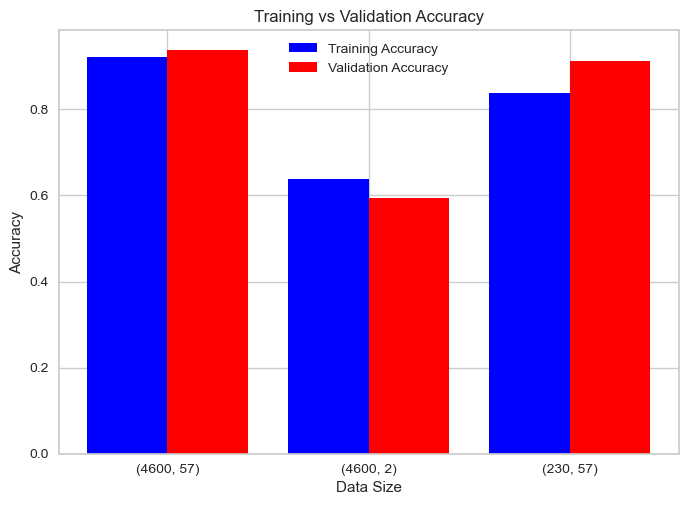

In [24]:
# For Visual representation of the above "results", we plot a bar graph 
import matplotlib.pyplot as plt
# Sample data from the results DataFrame
data_sizes = results['Data size']
training_accuracies = results['Training accuracy']
validation_accuracies = results['Validation accuracy']
# Create an index for each tick position
ind = np.arange(len(data_sizes))
# Plotting the bar chart
width = 0.4  # Width of the bars
# Plotting training accuracy
plt.bar(ind - width/2, training_accuracies, width, label='Training Accuracy', color='blue')
# Plotting test accuracy
plt.bar(ind + width/2, validation_accuracies, width, label='Validation Accuracy', color='red')
# Describing the data
plt.xlabel('Data Size')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
# Adding labels to the x-axis
plt.xticks(ind, data_sizes)
# Adding a legend
plt.legend()
# Displaying the plot
plt.show()

### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
2. In this case, what do a false positive and a false negative represent? Which one is worse?

*YOUR ANSWERS HERE*

Answer 01:
Model 1 which used the original feature matrix X and the target vector y had 4600 samples with 57 features. This model had a training accuracy of 92.22% and a validation accuracy of 93.69%. This high training accuracy demonstrates that the model makes accurate predictions indicating low bias. And the very low difference (1.47%) between the training and validation accuracy indicates a low variance and that the model predicts well with new data. It is a well-fitted model that performs well on both the training and validation datasets. 

Model 2 which used only the first two columns of the original feature matrix i.e., X_columns and the same target vector y had 4600 samples, but only 2 features. This model had a training accuracy of 63.77& and a validation accuracy of 59.34%. The very low training accuracy demonstrates that the model does not fit the training data well indicating a high bias which is likely due to the reduced feature set making the model too simple. The difference (4.43%) between the training and validation accuracy indicates a moderate variance. And the model performs poorly on both the training and validation datasets and is underfitting since only 2 features were considered indicating that the model is too simple to capture the data’s complexity effectively.

Model 3 which used just 5% of the original dataset had 230 samples with 57 features. This model had a training accuracy of 83.69% and a validation accuracy of 91.30%. The model has decent training accuracy demonstrating that certain patterns are accurately captured, if not all. This indicates a moderate bias. The difference (7.61%) between the training and validation accuracy indicates a high variance which may be due to the small size of the dataset. The model potentially overfits even though one would expect the training accuracy to be significantly higher than the validation accuracy in overfitting scenarios. 

Answer 02:
A false positive happens when the model incorrectly classifies a non-spam message as spam. This means that a legitimate email is flagged as spam and potentially gets moved to the spam folder.

A false negative happens when the model incorrectly classifies a spam message as non-spam. This means that a spam email is not flagged as spam and ends up in the user's inbox.

The worse condition between the two situations purely is based on the specific use case and the priorities of users. But if I had to pick one, I would say a false positive is worse wherein legitimate emails are classified as spam, thereby causing users to potentially miss important or non-spam messages if they do not regularly check their spam folders.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Answer: 
I followed the steps as instructed in this notebook. 

The following resources were referred to for completing this question - lecture notes, Jupyter notebooks on machine learning, model selection, and linear regression, Python Data Science handbook, and a few of the Jupyter Notebooks related to Pandas from ENSF592. 

A few challenges that I faced were forgetting the commands for accessing the column or element in a 'DataFrame' vs a 'Series' vs a numpy array. I was able to overcome this hurdle by working on ipython and visualizing a very small dataframe sample and seeing how it varied from a series. And in this assignment Jupyter notebook, having multiple print() statements in between helped me visualize the table or the section of data I was working with, especially how the X and y datasets varied when only parts or subsets of the original X and y were considered. 

I also had a little trouble plotting the training vs validation accuracy for the different data sizes, since I had represented the data size as a tuple of the number of samples and the number of features. I was unsure as to how I wanted to indicate the tuple in my bar graph - if I just wanted to show the number of samples in each dataset or would it be wiser to show the shape of each dataset! The generative AI helped with the command for bar width and creating an index for the data sizes. I did not have to modify my code for "results" per say, since this bar graph was only a part of visual representation. 

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [25]:
# Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

In [26]:
# Load the concrete dataset into a feature matrix X and a target vector y
X, y = load_concrete()

In [27]:
# Print the size and type of the feature matrix X 
# Shape indicates (n_samples, n_features)
print("The shape of feature matrix X: ", X.shape) 
print("The type of feature matrix X: ", type(X))

The shape of feature matrix X:  (1030, 8)
The type of feature matrix X:  <class 'pandas.core.frame.DataFrame'>


In [28]:
# Print the size and type of the target vector y 
# Shape indicates length (n_samples)
print("The shape of target vector y: ", y.shape) 
print("The type of taget vector y: ", type(y))

The shape of target vector y:  (1030,)
The type of taget vector y:  <class 'pandas.core.series.Series'>


In [29]:
# Shows the various columns present in the feature matrix 
# (i.e., 8 features = 8 columns)
X.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [30]:
# Shows the 1D target array having only 1 column (i.e., strength)
y.head(10)

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
5    47.029847
6    43.698299
7    36.447770
8    45.854291
9    39.289790
Name: strength, dtype: float64

### Step 2: Data Processing (0.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [31]:
# Check if the X dataframe contains any missing or NaN values
# sum() indicates the total count of NaN values present in each column 
X.isnull().sum()

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64

In [32]:
# Check if the target vector y has any missing values 
# present in its 1 column (i.e., strength)
y.isnull().sum()

0

In [33]:
# As seen in the above 2 commands, there are no missing or NaN values
# in either the feature matrix X or the target vector y
# Hence it is not necessary to use a method to fill in missing values
# If missing values had existed, we would have used the following commands
# assuming that we are filling it with Zeros instead of just dropping 
# the row or column containing missing or NaN values 
# X.fillna(0) # For feature matrix X
# y.fillna(0) # For target vector y 

### Step 3: Implement Machine Learning Model (1 mark)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`.
3. Implement the machine learning model with `X` and `y`

In [34]:
# Choose a model class (in this case - Linear Regression) 
from sklearn.linear_model import LinearRegression

In [35]:
# Instantiate the model 
model = LinearRegression()

In [36]:
# Implement the above model with X and y dataset
# 20& data to test and 80% data to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
# Fit the model on the training set
model.fit(X_train, y_train)
# Evaluate the model with the testing set and compare it with the training set 
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred = model.fit(X_train, y_train).predict(X_test)
y_train_pred = model.fit(X_test, y_test).predict(X_train)

### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [37]:
# Calculate mean squared error for training and validation data
training_mse = mean_squared_error(y_train, y_train_pred)
testing_mse = mean_squared_error(y_test, y_test_pred)
print("With mean squared error(MSE), the training accuracy is: ", training_mse)
print("With mean squared error(MSE), the validation accuracy is: ", testing_mse)

With mean squared error(MSE), the training accuracy is:  116.03257386628557
With mean squared error(MSE), the validation accuracy is:  95.63533482690427


In [38]:
# Calculate R2 score for training and validation data
training_r2 = r2_score(y_train, y_train_pred)
testing_r2 = r2_score(y_test, y_test_pred)
print("With R2 score, the training accuracy is: ", training_r2)
print("With R2 score, the validation accuracy is: ", testing_r2)

With R2 score, the training accuracy is:  0.5889230398422326
With R2 score, the validation accuracy is:  0.6368981103411243


### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [39]:
# Create a DataFrame to store the results
results = pd.DataFrame({'Training Accuracy': [training_mse, training_r2],
    'Validation Accuracy': [testing_mse, testing_r2]}, index=['MSE', 'R2 Score'])
# Print the results DataFrame
print(results)

          Training Accuracy  Validation Accuracy
MSE              116.032574            95.635335
R2 Score           0.588923             0.636898


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

Answer: 
Using these 2 linear models have not produced good results. 

In the case of linear regression using mean squared error (MSE), the MSE values for the training and validation set are relatively very high. And the difference between the training and validation accuracy indicates high variance. This demonstrates that the model's predictions are not close enough to the actual values. This can be due to various factors like inadequate model complexity, poor feature selection, overfitting, or underfitting. The high MSE values may also be due to squaring the errors i.e., differences between predicted and actual values. 

While in the case of linear regression using R2 score, an R2 score of 0.63 indicates a moderate fit to the data. The difference between the training and validation accuracy indicates moderate variance. An R2 score closer to 1 would have indicated that the model perfectly predicts the target variable

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

Answer: 
I followed the steps as instructed in this notebook. 

The following resources were referred to for completing this question - lecture notes, Jupyter notebooks on machine learning, model selection, linear regression, and Regression metrics, Python Data Science handbook, and a few of the Jupyter Notebooks related to Pandas from ENSF592. 

I was unsure if I had to implement 3 different datasets (X and y; X_col and y_col; and X_small and y_small) as indicated in the spam question above, since Part 2 of this question indicated that I needed to follow steps 1-4 as before. But as I moved down the steps, I realized that I need to be working with just X and y and no other additional datasets. 

I wanted to know if the MSE values could exceed 100 and I took the help from generative AI to know more about it. I did not have to modify my code for "results" per say, since the query was put forth only after running my code and getting an mse value exceeding 100. 

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

Answer: 
The high MSE value (116.0) demonstrates that the model has high error rates, and the predicted values are far from the actual values. It might be a sign of underfitting, where the model is too simple to capture the underlying patterns in the data. A lower validation error (95.6) may sometimes be due to the particular split of the data, where the validation set is somehow easier for the model to predict. 

An R2 score of 0.63 indicates a moderate fit to the data. While the model may be simple (potentially underfitting the training data), it is reasonably effective at making predictions on new, unseen data. Similar to the MSE, the R2 score is higher (0.63) on the validation set, which demonstrates that the model is explaining a higher proportion of variance in the validation data than in the training data. It’s an unusual pattern because models typically perform better on the training data. 

Cross-validation or repeated experiments with different splits can be helpful in finding out if this pattern is consistent or just a result of the specific split of the data.

Some possible explanations for this unusual behavior may include:

The specific random split between training and validation data might have led to a situation where the validation set is somehow “easier” to predict, or the training set contains more complex or noisy examples.

The size and features of the training and validation sets can influence these metrics. 

If the training data contains more noise, outliers, or difficult to predict examples, the model might have a higher error on the training set.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

Answer: 
I liked the fact that this exercise/assignment was hands-on and it helped me have a better understanding of what was taught in the lectures/labs and the examples that were discussed in Jupyter Notebooks. 

I found it interesting to notice that not all datasets deliver the expected "perfect" pattern or result. There may be datasets whose patterns deviate from normal. 

I find it challenging when I have to interpret such unusual results or patterns. This motivates me to learn more about such topics so that I don't feel stuck or clueless as to what the results mean. And working on multiple examples has been really helpful. Also, I would like to put in more effort on the visual aspect (such as plotting graphs) of the data so that graphs could aid me in finding patterns of some kind in the dataset. 

The only part I found confusing was when we had to predict the y after fitting the model with the training set i.e., "model.fit(X_train, y_train)". When we move ahead to evaluate the training and validation accuracy, we use the above model to predict using "model.predict(X_test)" for instance. And we use a similar statement for the determination of training accuracy as well. But "model" in that statement would still contain the training dataset, thereby making the prediction as say (around 100% accuracy - since it is predicting training using training data itself). To avoid that confusion, I have been explicitly writing "model.fit(X_train, y_train).predict(X_test)" for the testing accuracy and a similar statement using the testing data for the training accuracy. 

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

In [40]:
X, y = load_concrete()
# Choose a model class (in this case - Ridge regression) 
from sklearn.linear_model import Ridge
# Instantiate the model 
model = Ridge(alpha=0.001)
# Implement the above model with X and y dataset
# 20& data to test and 80% data to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
# Evaluate the model with the testing set and compare it with the training set 
print("Training score: {:.6f}".format(Ridge(alpha=0.001).fit(X_test, y_test).score(X_train, y_train)))
print("Validation score: {:.6f}".format(Ridge(alpha=0.001).fit(X_train, y_train).score(X_test, y_test)))

Training score: 0.588923
Validation score: 0.636898


In [41]:
X, y = load_concrete()
# Choose a model class (in this case - Ridge regression) 
from sklearn.linear_model import Ridge
# Instantiate the model 
model = Ridge(alpha=100)
# Implement the above model with X and y dataset
# 20& data to test and 80% data to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
# Evaluate the model with the testing set and compare it with the training set 
print("Training score: {:.6f}".format(Ridge(alpha=100).fit(X_test, y_test).score(X_train, y_train)))
print("Validation score: {:.6f}".format(Ridge(alpha=100).fit(X_train, y_train).score(X_test, y_test)))

Training score: 0.588906
Validation score: 0.636937


As we see in above Ridge regression model, the validation score (0.63) remained the same when compared with the R2 score model (which had a validation score of 0.63 as well). This indicates that the Ridge model performs similarly to the R2 score model. 

However, changing the alpha value from 0.001 to 100 in the Ridge model had almost negligible effect on the validation score, since a difference of only 0.000039 was noticed. It is worth noting that making such a change in the alpha value is not significant enough since the validation score of the model is not affected whatsoever. 

Now let us consider the case of Lasso Regression model

In [42]:
from sklearn.linear_model import Lasso
print("Training set score: {:.6f}".format(Lasso(alpha=0.001, max_iter=100000).fit(X_test, y_test).score(X_train, y_train)))
print("Validation set score: {:.6f}".format(Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train).score(X_test, y_test)))
print("Number of features used:", np.sum(Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train).coef_ != 0))

Training set score: 0.588922
Validation set score: 0.636899
Number of features used: 8


In [43]:
from sklearn.linear_model import Lasso
print("Training set score: {:.6f}".format(Lasso(alpha=100, max_iter=100000).fit(X_test, y_test).score(X_train, y_train)))
print("Validation set score: {:.6f}".format(Lasso(alpha=100, max_iter=100000).fit(X_train, y_train).score(X_test, y_test)))
print("Number of features used:", np.sum(Lasso(alpha=100, max_iter=100000).fit(X_train, y_train).coef_ != 0))

Training set score: 0.406844
Validation set score: 0.521070
Number of features used: 5


As we see in above Lasso Regression model, the validation score (0.63) with alpha=0.001 has remained the same when compared with the R2 score model (which had a validation score of 0.63 as well). This indicates that the Lasso model performs similarly when compared to the R2 score model. 

However, changing the alpha value from 0.001 to 100 in the Lasso model has significantly reduced the validation score from 0.63 down to 0.52 (and also reduced the number of features considered from 8 to 5), a significant 11% drop. Hence, it can be concluded that the Lasso model with alpha value of 0.001 performs better when compared to the same model with an alpha value of 100 to improve the validation score of the model. 

Now when we compare the above 2 models i.e., Ridge and the Lasso model, we notice that the validation score obtained from both these models is the same (0.63) as that obtained by the R2 score model (0.63). Hence, it is safe to assume that all 3 models generalize the data reasonably well (i.e., the models are a moderate fit for the data) which is indicated by their validation scores. 